In [18]:
import pickle
file_name = 'correct_gpt_future.pkl'

try:
    with open(file_name, 'rb') as file:
        loaded_data = pickle.load(file)
    # Now, 'loaded_data' contains the deserialized object from the pickle file
except FileNotFoundError:
    print(f"File '{file_name}' not found.")
except Exception as e:
    print(f"An error occurred while opening the file: {str(e)}")


In [19]:
loaded_data['base_2011']['columns']

['lr_train_acc',
 'lr_test_acc',
 'svc_train_acc',
 'svc_test_acc',
 'lr_precision',
 'lr_recall',
 'lr_f1',
 'svc_precision',
 'svc_recall',
 'svc_f1',
 'OVO_auroc',
 'OVR_auroc']

In [20]:
lr_dict = {}
svm_dict = {}

for base_year in loaded_data.keys():
    lr_dict[base_year] = {}  # Initialize an empty sub-dictionary for each base year
    for year in loaded_data[base_year].keys():
        if year != 'columns':
            lr_dict[base_year][year] = sum(loaded_data[base_year][year][10])/10


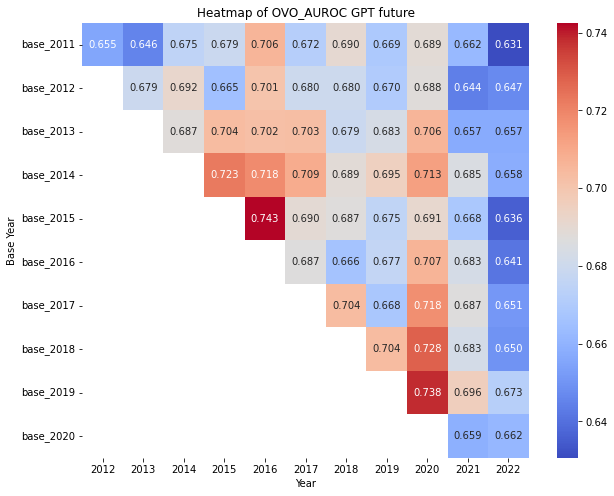

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame.from_dict(lr_dict, orient='index')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".3f", cbar=True)

# Customize the plot
plt.title('Heatmap of OVO_AUROC GPT future')
plt.xlabel('Year')
plt.ylabel('Base Year')

# Show the plot
plt.show()